<a href="https://colab.research.google.com/github/Jisha25/ML-Project-1/blob/main/ML_project_org.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Crime Analysis and Prediction Using Machine Learning Models***

# 1. Data Collection


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV # Import the RandomizedSearchCV class from sklearn.model_selection
from sklearn.base import BaseEstimator, ClassifierMixin
from xgboost import XGBClassifier

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/files/Crime_Incidents_in_2024.csv')

In [ ]:
df.columns

Index(['X', 'Y', 'CCN', 'REPORT_DAT', 'SHIFT', 'METHOD', 'OFFENSE', 'BLOCK',
       'XBLOCK', 'YBLOCK', 'WARD', 'ANC', 'DISTRICT', 'PSA',
       'NEIGHBORHOOD_CLUSTER', 'BLOCK_GROUP', 'CENSUS_TRACT',
       'VOTING_PRECINCT', 'LATITUDE', 'LONGITUDE', 'BID', 'START_DATE',
       'END_DATE', 'OBJECTID', 'OCTO_RECORD_ID'],
      dtype='object')

In [ ]:
df.head()

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,396384.27,137427.7600,24054605,2024/04/12 14:24:15+00,DAY,OTHERS,THEFT F/AUTO,1100 - 1199 BLOCK OF 18TH STREET NW,396384.270000,137427.760000,...,010700 1,10700.0,Precinct 17,38.904699,-77.041686,GOLDEN TRIANGLE,2024/04/12 06:33:00+00,2024/04/12 08:59:00+00,666213423,NaN
1,395709.91,137490.9400,24056000,2024/04/14 23:56:40+00,EVENING,OTHERS,THEFT/OTHER,2200 - 2299 BLOCK OF M STREET NW,395709.910000,137490.940000,...,005501 2,5501.0,Precinct 4,38.905265,-77.049461,NaN,2024/04/14 04:00:00+00,NaN,666213424,NaN
2,397497.55,137053.1300,24056385,2024/04/15 17:42:57+00,DAY,OTHERS,THEFT/OTHER,1200 - 1299 BLOCK OF I STREET NW,397497.550000,137053.130000,...,010100 2,10100.0,Precinct 129,38.901328,-77.028849,DOWNTOWN,2024/04/15 14:31:00+00,2024/04/15 15:18:00+00,666213769,NaN
3,400040.61,129046.4721,18060158,2024/07/30 04:00:00+00,MIDNIGHT,GUN,HOMICIDE,400 - 599 BLOCK OF CHESAPEAKE STREET SE,400040.610046,129046.472149,...,009802 2,9802.0,Precinct 125,38.829204,-76.999532,NaN,2018/04/15 16:07:00+00,2018/04/15 17:34:56+00,666236835,NaN
4,397171.11,137408.2500,24013789,2024/01/28 07:33:28+00,MIDNIGHT,OTHERS,THEFT/OTHER,1100 - 1199 BLOCK OF VERMONT AVENUE NW,397171.110000,137408.250000,...,010100 3,10100.0,Precinct 17,38.904526,-77.032614,DOWNTOWN,2024/01/28 06:41:00+00,2024/01/28 07:12:00+00,666239683,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29295 entries, 0 to 29294
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   X                     29295 non-null  float64
 1   Y                     29295 non-null  float64
 2   CCN                   29295 non-null  int64  
 3   REPORT_DAT            29295 non-null  object 
 4   SHIFT                 29295 non-null  object 
 5   METHOD                29295 non-null  object 
 6   OFFENSE               29295 non-null  object 
 7   BLOCK                 29295 non-null  object 
 8   XBLOCK                29295 non-null  float64
 9   YBLOCK                29295 non-null  float64
 10  WARD                  29291 non-null  float64
 11  ANC                   29291 non-null  object 
 12  DISTRICT              28550 non-null  float64
 13  PSA                   28827 non-null  float64
 14  NEIGHBORHOOD_CLUSTER  29291 non-null  object 
 15  BLOCK_GROUP        

### **Dropping Irrelevent columns**

In [ ]:
df = df.drop(['CCN', 'OCTO_RECORD_ID', 'BLOCK', 'OBJECTID'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29295 entries, 0 to 29294
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   X                     29295 non-null  float64
 1   Y                     29295 non-null  float64
 2   REPORT_DAT            29295 non-null  object 
 3   SHIFT                 29295 non-null  object 
 4   METHOD                29295 non-null  object 
 5   OFFENSE               29295 non-null  object 
 6   XBLOCK                29295 non-null  float64
 7   YBLOCK                29295 non-null  float64
 8   WARD                  29291 non-null  float64
 9   ANC                   29291 non-null  object 
 10  DISTRICT              28550 non-null  float64
 11  PSA                   28827 non-null  float64
 12  NEIGHBORHOOD_CLUSTER  29291 non-null  object 
 13  BLOCK_GROUP           29280 non-null  object 
 14  CENSUS_TRACT          29280 non-null  float64
 15  VOTING_PRECINCT    

### **Handel Null Value**

In [ ]:
df.isnull().sum()

,0
X,0
Y,0
REPORT_DAT,0
SHIFT,0
METHOD,0
OFFENSE,0
XBLOCK,0
YBLOCK,0
WARD,4
ANC,4


In [ ]:
for col in ['WARD', 'DISTRICT', 'PSA', 'CENSUS_TRACT', 'LATITUDE', 'LONGITUDE']:  #numerical
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)

In [ ]:
for col in ['ANC', 'NEIGHBORHOOD_CLUSTER', 'BLOCK_GROUP', 'VOTING_PRECINCT', 'BID', 'START_DATE', 'END_DATE']: #categorical
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)


In [ ]:
df.isnull().sum()

,0
X,0
Y,0
REPORT_DAT,0
SHIFT,0
METHOD,0
OFFENSE,0
XBLOCK,0
YBLOCK,0
WARD,0
ANC,0


### **Convert Date_Time**

In [ ]:
df['REPORT_DAT'] = pd.to_datetime(df['REPORT_DAT'])

In [ ]:
df['Month'] = df['REPORT_DAT'].dt.month
df['Day'] = df['REPORT_DAT'].dt.day
df['Hour'] = df['REPORT_DAT'].dt.hour
df['Year'] = df['REPORT_DAT'].dt.year

In [ ]:
for col in ['START_DATE', 'END_DATE']:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [ ]:
df['Start_Year'] = pd.to_datetime(df['START_DATE'], errors='coerce').dt.year
df['Start_Month'] = pd.to_datetime(df['START_DATE'], errors='coerce').dt.month
df['Start_Day'] = pd.to_datetime(df['START_DATE'], errors='coerce').dt.day
df['Start_Hour'] = pd.to_datetime(df['START_DATE'], errors='coerce').dt.hour

df['End_Year'] = pd.to_datetime(df['END_DATE'], errors='coerce').dt.year
df['End_Month'] = pd.to_datetime(df['END_DATE'], errors='coerce').dt.month
df['End_Day'] = pd.to_datetime(df['END_DATE'], errors='coerce').dt.day
df['End_Hour'] = pd.to_datetime(df['END_DATE'], errors='coerce').dt.hour



In [ ]:
df = df.drop(['START_DATE', 'END_DATE','REPORT_DAT'], axis=1)

In [ ]:
#encoding all columns with datatype object
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29295 entries, 0 to 29294
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   X                     29295 non-null  float64
 1   Y                     29295 non-null  float64
 2   SHIFT                 29295 non-null  int64  
 3   METHOD                29295 non-null  int64  
 4   OFFENSE               29295 non-null  int64  
 5   XBLOCK                29295 non-null  float64
 6   YBLOCK                29295 non-null  float64
 7   WARD                  29295 non-null  float64
 8   ANC                   29295 non-null  int64  
 9   DISTRICT              29295 non-null  float64
 10  PSA                   29295 non-null  float64
 11  NEIGHBORHOOD_CLUSTER  29295 non-null  int64  
 12  BLOCK_GROUP           29295 non-null  int64  
 13  CENSUS_TRACT          29295 non-null  float64
 14  VOTING_PRECINCT       29295 non-null  int64  
 15  LATITUDE           

In [ ]:
df.head()

,X,Y,SHIFT,METHOD,OFFENSE,XBLOCK,YBLOCK,WARD,ANC,DISTRICT,...,Hour,Year,Start_Year,Start_Month,Start_Day,Start_Hour,End_Year,End_Month,End_Day,End_Hour
0,396384.27,137427.7600,0,2,7,396384.270000,137427.760000,2.0,7,2.0,...,14,2024,2024,4,12,6,2024,4,12,8
1,395709.91,137490.9400,1,2,8,395709.910000,137490.940000,2.0,5,2.0,...,23,2024,2024,4,14,4,2024,6,24,4
2,397497.55,137053.1300,0,2,8,397497.550000,137053.130000,2.0,7,2.0,...,17,2024,2024,4,15,14,2024,4,15,15
3,400040.61,129046.4721,2,0,3,400040.610046,129046.472149,8.0,44,7.0,...,4,2024,2018,4,15,16,2018,4,15,17
4,397171.11,137408.2500,2,2,8,397171.110000,137408.250000,2.0,7,2.0,...,7,2024,2024,1,28,6,2024,1,28,7


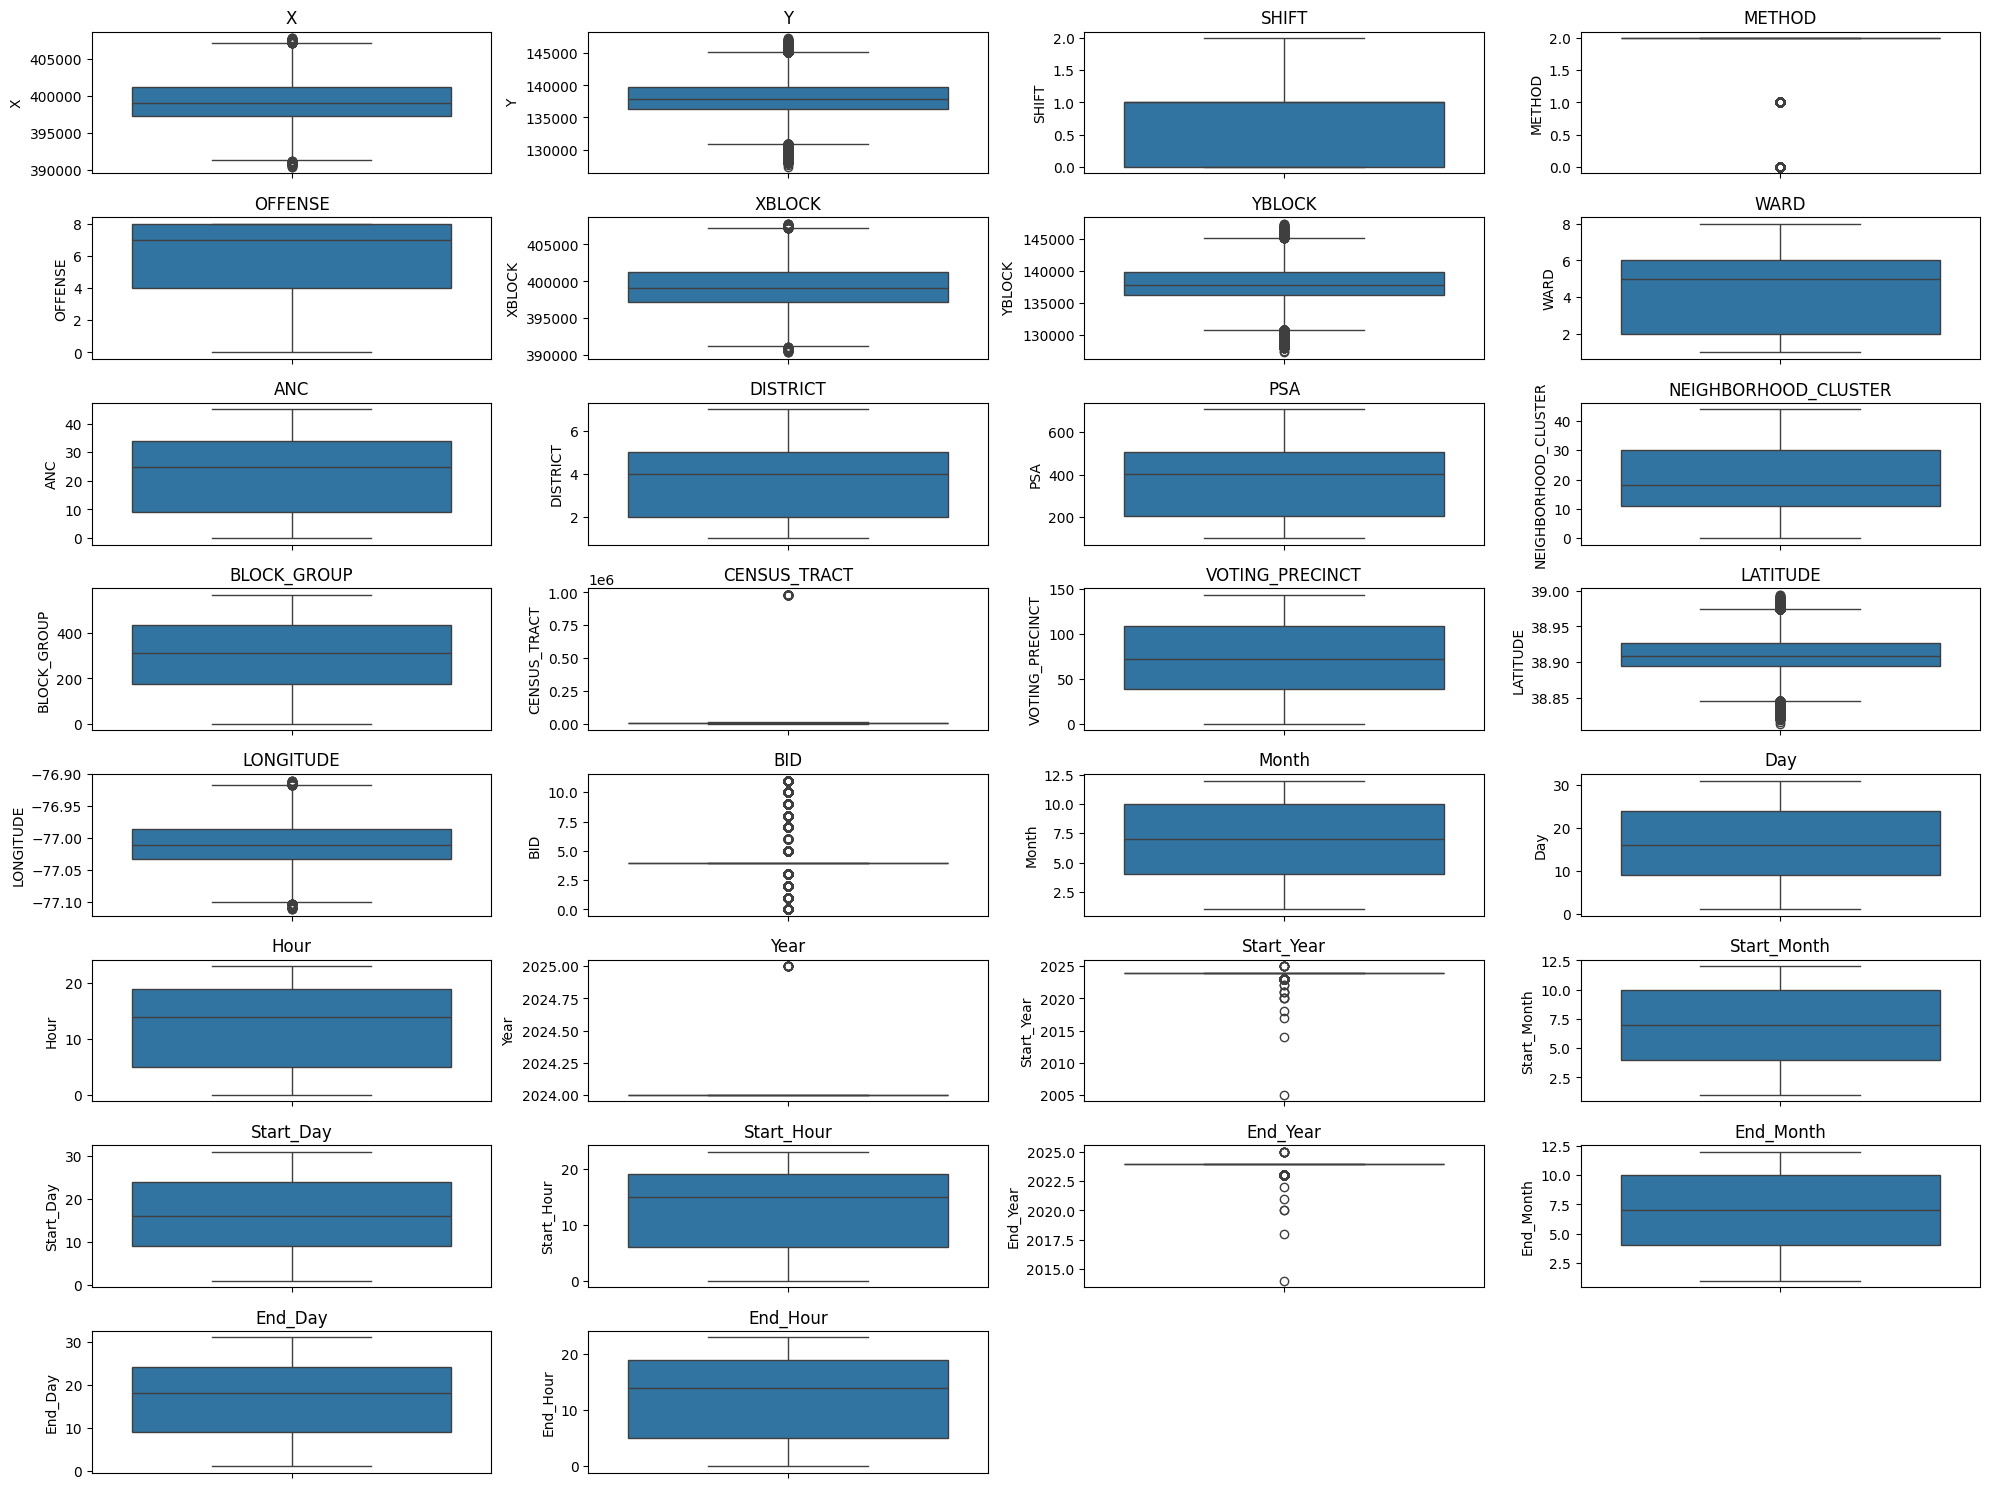

In [ ]:
plt.figure(figsize=(20, 15))
# Calculate the number of numerical columns
num_cols = len(df.select_dtypes(include=np.number).columns)
# Calculate the number of rows needed for the subplots
num_rows = (num_cols + 3) // 4  # Ensure enough rows to accommodate all columns

for i, col in enumerate(df.select_dtypes(include=np.number).columns):
    plt.subplot(num_rows, 4, i + 1)  # Adjust the subplot grid as needed
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
for col in ['CENSUS_TRACT', 'BID', 'Start_Year', 'End_Year']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [ ]:
for col in ['X', 'Y', 'XBLOCK', 'YBLOCK', 'WARD', 'DISTRICT', 'PSA']:
    lower_bound = df[col].quantile(0.01)
    upper_bound = df[col].quantile(0.99)
    df[col] = np.clip(df[col], lower_bound, upper_bound)

In [ ]:
df['CENSUS_TRACT'] = np.log1p(df['CENSUS_TRACT'])

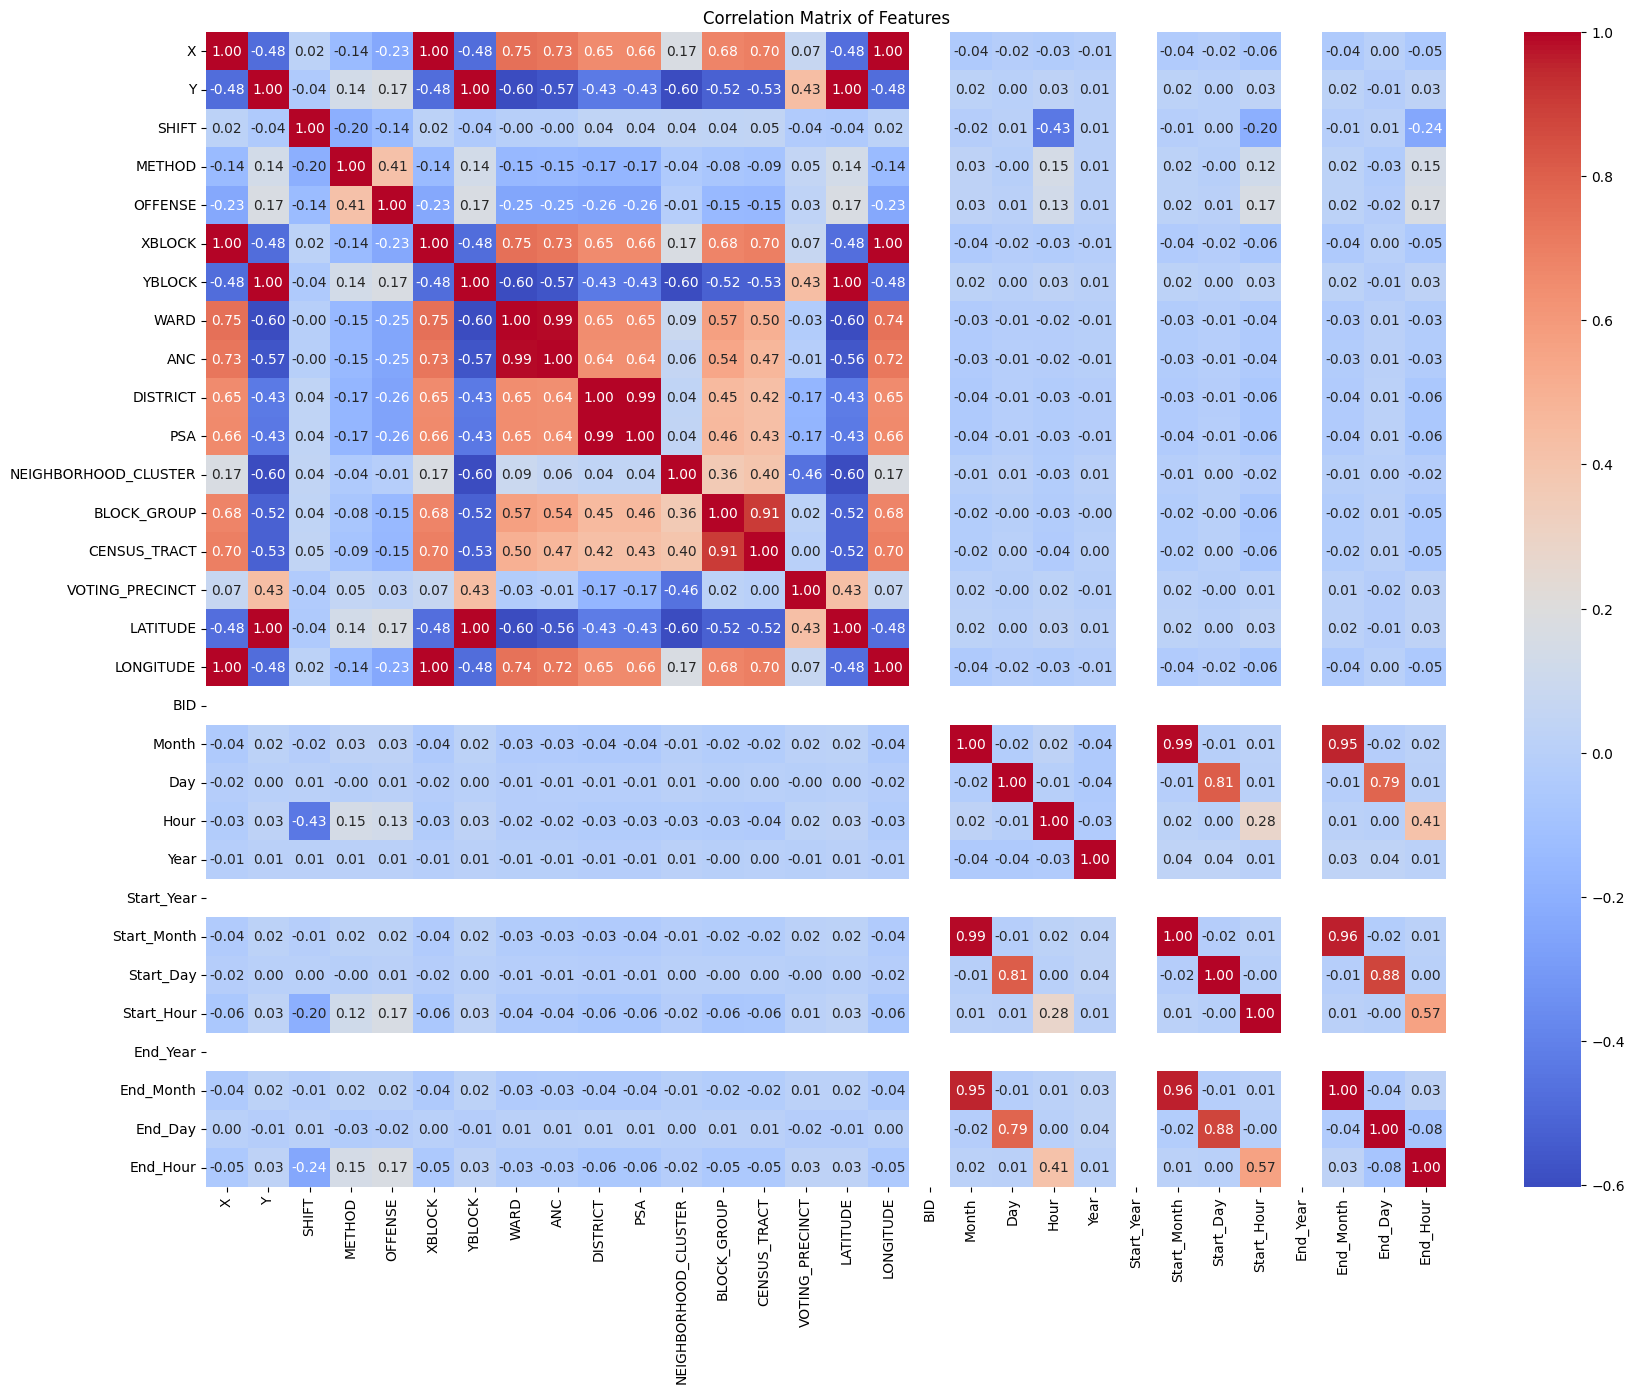

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


In [ ]:
# prompt: drop column with low corelation


threshold = 0.1  # Set your desired correlation threshold

low_correlation_cols = correlation_matrix[abs(correlation_matrix['OFFENSE']) < threshold].index.tolist()


# Remove the target variable itself from the list if present
if 'OFFENSE' in low_correlation_cols:
    low_correlation_cols.remove('OFFENSE')

# Drop the columns with low correlation
df = df.drop(columns=low_correlation_cols)

print(f"Columns dropped due to low correlation: {low_correlation_cols}")
df.columns


Columns dropped due to low correlation: ['NEIGHBORHOOD_CLUSTER', 'VOTING_PRECINCT', 'Month', 'Day', 'Year', 'Start_Month', 'Start_Day', 'End_Month', 'End_Day']


Index(['X', 'Y', 'SHIFT', 'METHOD', 'OFFENSE', 'XBLOCK', 'YBLOCK', 'WARD',
       'ANC', 'DISTRICT', 'PSA', 'BLOCK_GROUP', 'CENSUS_TRACT', 'LATITUDE',
       'LONGITUDE', 'BID', 'Hour', 'Start_Year', 'Start_Hour', 'End_Year',
       'End_Hour'],
      dtype='object')

# 2. ML

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop("OFFENSE", axis=1)  # Assuming 'OFFENSE' is the target
y = df["OFFENSE"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 3. Model Training WITHOUT SMOTE


In [ ]:
# Logistic Regression Model
lr_model = LogisticRegression(max_iter=500, random_state=42)
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluation
train_score_lr = lr_model.score(X_train, y_train)
test_score_lr = lr_model.score(X_test, y_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print(f"Logistic Regression - Overall Accuracy: {accuracy_lr:.4f}")
print(f"Logistic Regression - Training Accuracy: {train_score_lr:.4f}")
print(f"Logistic Regression - Testing Accuracy: {test_score_lr:.4f}")

Logistic Regression - Overall Accuracy: 0.4897
Logistic Regression - Training Accuracy: 0.4986
Logistic Regression - Testing Accuracy: 0.4897


In [ ]:
# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluation
train_score_dt = dt_model.score(X_train, y_train)
test_score_dt = dt_model.score(X_test, y_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print(f"Decision Tree - Overall Accuracy: {accuracy_dt:.4f}")
print(f"Decision Tree - Training Accuracy: {train_score_dt:.4f}")
print(f"Decision Tree - Testing Accuracy: {test_score_dt:.4f}")

Decision Tree - Overall Accuracy: 0.4891
Decision Tree - Training Accuracy: 0.9970
Decision Tree - Testing Accuracy: 0.4891


In [ ]:
# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
train_score_rf = rf_model.score(X_train, y_train)
test_score_rf = rf_model.score(X_test, y_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest - Overall Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest - Training Accuracy: {train_score_rf:.4f}")
print(f"Random Forest - Testing Accuracy: {test_score_rf:.4f}")

Random Forest - Overall Accuracy: 0.5560
Random Forest - Training Accuracy: 0.9969
Random Forest - Testing Accuracy: 0.5560


In [ ]:
# Gradient Boosting Model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluation
train_score_gb = gb_model.score(X_train, y_train)
test_score_gb = gb_model.score(X_test, y_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

print(f"Gradient Boosting - Overall Accuracy: {accuracy_gb:.4f}")
print(f"Gradient Boosting - Training Accuracy: {train_score_gb:.4f}")
print(f"Gradient Boosting - Testing Accuracy: {test_score_gb:.4f}")

Gradient Boosting - Overall Accuracy: 0.5546
Gradient Boosting - Training Accuracy: 0.5937
Gradient Boosting - Testing Accuracy: 0.5546


In [ ]:
# AdaBoost Model
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)

# Predictions
y_pred_ada = ada_model.predict(X_test)

# Evaluation
train_score_ada = ada_model.score(X_train, y_train)
test_score_ada = ada_model.score(X_test, y_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)

print(f"AdaBoost - Overall Accuracy: {accuracy_ada:.4f}")
print(f"AdaBoost - Training Accuracy: {train_score_ada:.4f}")
print(f"AdaBoost - Testing Accuracy: {test_score_ada:.4f}")

AdaBoost - Overall Accuracy: 0.4553
AdaBoost - Training Accuracy: 0.4546
AdaBoost - Testing Accuracy: 0.4553


In [ ]:
# XGBoost Model
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
train_score_xgb = xgb_model.score(X_train, y_train)
test_score_xgb = xgb_model.score(X_test, y_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print(f"XGBoost - Overall Accuracy: {accuracy_xgb:.4f}")
print(f"XGBoost - Training Accuracy: {train_score_xgb:.4f}")
print(f"XGBoost - Testing Accuracy: {test_score_xgb:.4f}")

XGBoost - Overall Accuracy: 0.5816
XGBoost - Training Accuracy: 0.7820
XGBoost - Testing Accuracy: 0.5816


In [ ]:
# SVM Model
svm_model = SVC(kernel="linear", random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluation
train_score_svm = svm_model.score(X_train, y_train)
test_score_svm = svm_model.score(X_test, y_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"SVM - Overall Accuracy: {accuracy_svm:.4f}")
print(f"SVM - Training Accuracy: {train_score_svm:.4f}")
print(f"SVM - Testing Accuracy: {test_score_svm:.4f}")

SVM - Overall Accuracy: 0.4709
SVM - Training Accuracy: 0.4854
SVM - Testing Accuracy: 0.4709


In [ ]:
# KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Default k=5
knn_model.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluation
train_score_knn = knn_model.score(X_train, y_train)
test_score_knn = knn_model.score(X_test, y_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f"KNN - Overall Accuracy: {accuracy_knn:.4f}")
print(f"KNN - Training Accuracy: {train_score_knn:.4f}")
print(f"KNN - Testing Accuracy: {test_score_knn:.4f}")

KNN - Overall Accuracy: 0.5099
KNN - Training Accuracy: 0.6610
KNN - Testing Accuracy: 0.5099


In [ ]:
# Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluation
train_score_nb = nb_model.score(X_train, y_train)
test_score_nb = nb_model.score(X_test, y_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print(f"Naive Bayes - Overall Accuracy: {accuracy_nb:.4f}")
print(f"Naive Bayes - Training Accuracy: {train_score_nb:.4f}")
print(f"Naive Bayes - Testing Accuracy: {test_score_nb:.4f}")

Naive Bayes - Overall Accuracy: 0.4090
Naive Bayes - Training Accuracy: 0.4117
Naive Bayes - Testing Accuracy: 0.4090


In [ ]:
print(y.value_counts())


OFFENSE
8    10692
7     5877
4     4417
5     1888
1      950
2      869
3      166
6      111
0        2
Name: count, dtype: int64


In [ ]:
df = df[df['OFFENSE'] != 0]


# 4. Handling Imbalanced Data (SMOTE)


In [ ]:
# Apply SMOTE
class_counts = y.value_counts()

sampling_strategy = {}
for class_label, count in class_counts.items():
    sampling_strategy[class_label] = max(count, 3000)  # Oversample to at least 3000

smote = SMOTE(sampling_strategy=sampling_strategy, k_neighbors=5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f"Resampled dataset shape: {X_resampled.shape}")


# Feature Scaling
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Train-Test Split
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_resampled_scaled, y_resampled, test_size=0.2, random_state=42)


ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 3, n_samples_fit = 2, n_samples = 2

In [ ]:
lr_smote = LogisticRegression()
lr_smote.fit(X_train_sm, y_train_sm)

# Predictions
y_pred_lr_sm = lr_smote.predict(X_test_sm)

# Evaluation
train_score_lr_sm = lr_smote.score(X_train_sm, y_train_sm)
test_score_lr_sm = lr_smote.score(X_test_sm, y_test_sm)
accuracy_lr_sm = accuracy_score(y_test_sm, y_pred_lr_sm)

print(f"Logistic Regression (SMOTE) - Overall Accuracy: {accuracy_lr_sm:.4f}")
print(f"Logistic Regression (SMOTE) - Training Accuracy: {train_score_lr_sm:.4f}")
print(f"Logistic Regression (SMOTE) - Testing Accuracy: {test_score_lr_sm:.4f}")

Logistic Regression (SMOTE) - Overall Accuracy: 0.5043
Logistic Regression (SMOTE) - Training Accuracy: 0.5033
Logistic Regression (SMOTE) - Testing Accuracy: 0.5043


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
dt_smote = DecisionTreeClassifier(random_state=42)
dt_smote.fit(X_train_sm, y_train_sm)

# Predictions
y_pred_dt_sm = dt_smote.predict(X_test_sm)

# Evaluation
train_score_dt_sm = dt_smote.score(X_train_sm, y_train_sm)
test_score_dt_sm = dt_smote.score(X_test_sm, y_test_sm)
accuracy_dt_sm = accuracy_score(y_test_sm, y_pred_dt_sm)

print(f"Decision Tree (SMOTE) - Overall Accuracy: {accuracy_dt_sm:.4f}")
print(f"Decision Tree (SMOTE) - Training Accuracy: {train_score_dt_sm:.4f}")
print(f"Decision Tree (SMOTE) - Testing Accuracy: {test_score_dt_sm:.4f}")


Decision Tree (SMOTE) - Overall Accuracy: 0.8403
Decision Tree (SMOTE) - Training Accuracy: 0.9988
Decision Tree (SMOTE) - Testing Accuracy: 0.8403


In [ ]:
rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_sm, y_train_sm)

# Predictions
y_pred_rf_sm = rf_smote.predict(X_test_sm)

# Evaluation
train_score_rf_sm = rf_smote.score(X_train_sm, y_train_sm)
test_score_rf_sm = rf_smote.score(X_test_sm, y_test_sm)
accuracy_rf_sm = accuracy_score(y_test_sm, y_pred_rf_sm)

print(f"Random Forest (SMOTE) - Overall Accuracy: {accuracy_rf_sm:.4f}")
print(f"Random Forest (SMOTE) - Training Accuracy: {train_score_rf_sm:.4f}")
print(f"Random Forest (SMOTE) - Testing Accuracy: {test_score_rf_sm:.4f}")

Random Forest (SMOTE) - Overall Accuracy: 0.8962
Random Forest (SMOTE) - Training Accuracy: 0.9988
Random Forest (SMOTE) - Testing Accuracy: 0.8962


In [ ]:
gb_smote = GradientBoostingClassifier(random_state=42)
gb_smote.fit(X_train_sm, y_train_sm)

# Predictions
y_pred_gb_sm = gb_smote.predict(X_test_sm)

# Evaluation
train_score_gb_sm = gb_smote.score(X_train_sm, y_train_sm)
test_score_gb_sm = gb_smote.score(X_test_sm, y_test_sm)
accuracy_gb_sm = accuracy_score(y_test_sm, y_pred_gb_sm)

print(f"Gradient Boosting (SMOTE) - Overall Accuracy: {accuracy_gb_sm:.4f}")
print(f"Gradient Boosting (SMOTE) - Training Accuracy: {train_score_gb_sm:.4f}")
print(f"Gradient Boosting (SMOTE) - Testing Accuracy: {test_score_gb_sm:.4f}")

Gradient Boosting (SMOTE) - Overall Accuracy: 0.6851
Gradient Boosting (SMOTE) - Training Accuracy: 0.6926
Gradient Boosting (SMOTE) - Testing Accuracy: 0.6851


In [ ]:
ab_smote = AdaBoostClassifier(random_state=42)
ab_smote.fit(X_train_sm, y_train_sm)

# Predictions
y_pred_ab_sm = ab_smote.predict(X_test_sm)

# Evaluation
train_score_ab_sm = ab_smote.score(X_train_sm, y_train_sm)
test_score_ab_sm = ab_smote.score(X_test_sm, y_test_sm)
accuracy_ab_sm = accuracy_score(y_test_sm, y_pred_ab_sm)

print(f"AdaBoost (SMOTE) - Overall Accuracy: {accuracy_ab_sm:.4f}")
print(f"AdaBoost (SMOTE) - Training Accuracy: {train_score_ab_sm:.4f}")
print(f"AdaBoost (SMOTE) - Testing Accuracy: {test_score_ab_sm:.4f}")

AdaBoost (SMOTE) - Overall Accuracy: 0.4047
AdaBoost (SMOTE) - Training Accuracy: 0.4005
AdaBoost (SMOTE) - Testing Accuracy: 0.4047


In [ ]:
xgb_smote = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_smote.fit(X_train_sm, y_train_sm)

# Predictions
y_pred_xgb_sm = xgb_smote.predict(X_test_sm)

# Evaluation
train_score_xgb_sm = xgb_smote.score(X_train_sm, y_train_sm)
test_score_xgb_sm = xgb_smote.score(X_test_sm, y_test_sm)
accuracy_xgb_sm = accuracy_score(y_test_sm, y_pred_xgb_sm)

print(f"XGBoost (SMOTE) - Overall Accuracy: {accuracy_xgb_sm:.4f}")
print(f"XGBoost (SMOTE) - Training Accuracy: {train_score_xgb_sm:.4f}")
print(f"XGBoost (SMOTE) - Testing Accuracy: {test_score_xgb_sm:.4f}")


In [ ]:
import pickle

# Assuming 'xgb_model' is your trained XGBoost model
model_filename = "xgboost_model.pkl"

# Save the model using pickle
with open(model_filename, "wb") as file:
    pickle.dump(xgb_model, file)

print("Model saved successfully as xgboost_model.pkl!")


Model saved successfully as xgboost_model.pkl!


In [ ]:
df.columns

Index(['X', 'Y', 'SHIFT', 'METHOD', 'OFFENSE', 'XBLOCK', 'YBLOCK', 'WARD',
       'ANC', 'DISTRICT', 'PSA', 'BLOCK_GROUP', 'CENSUS_TRACT', 'LATITUDE',
       'LONGITUDE', 'BID', 'Hour', 'Start_Year', 'Start_Hour', 'End_Year',
       'End_Hour'],
      dtype='object')

In [ ]:
df['ANC'].unique()

array([ 5,  7, 26, 17,  0, 19, 37, 40,  9, 35,  6, 42, 28,  1, 39, 20, 27,
       36, 44, 29, 18, 30,  4, 23, 43, 10, 34, 11, 38, 21, 25, 13, 15, 31,
       41,  3, 32, 24, 22, 14, 12, 16,  2, 33,  8, 45])

SEX ABUSE                     8600
BURGLARY                      4655
ROBBERY                       3527
ASSAULT W/DANGEROUS WEAPON    1507
THEFT/OTHER                    762
HOMICIDE                       701
MOTOR VEHICLE THEFT            142
ARSON                           81
THEFT F/AUTO                     2
Name: count, dtype: int64


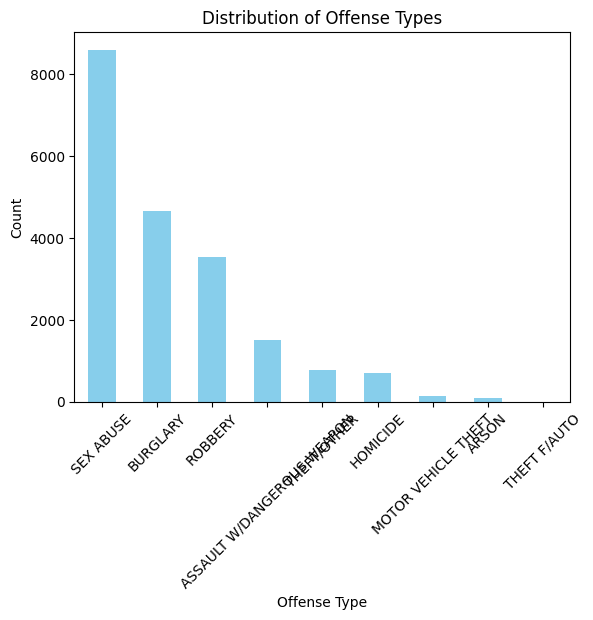

In [ ]:
# Assuming you have a mapping dictionary used for encoding
offense_mapping = {
    0: 'THEFT F/AUTO', 1: 'THEFT/OTHER', 2: 'HOMICIDE', 3: 'MOTOR VEHICLE THEFT',
    4: 'ROBBERY', 5: 'ASSAULT W/DANGEROUS WEAPON', 6: 'ARSON', 7: 'BURGLARY', 8: 'SEX ABUSE'
}

# Convert numeric labels to text
y_train_text = [offense_mapping[label] for label in y_train]

# Check value counts
print(pd.Series(y_train_text).value_counts())

# Plot
pd.Series(y_train_text).value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of Offense Types")
plt.xlabel("Offense Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pickle

# Update the filename to match the saved model in the previous cell
with open("xgboost_model.pkl", "rb") as file:
    model = pickle.load(file)

print(model.classes_)  # Check class order

[0 1 2 3 4 5 6 7 8]


In [ ]:
import pandas as pd

# Load your dataset to confirm class order, providing full file path
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/files/Crime_Incidents_in_2024.csv')
print(data['OFFENSE'].unique())  # Check the actual class order

['THEFT F/AUTO' 'THEFT/OTHER' 'HOMICIDE' 'MOTOR VEHICLE THEFT' 'ROBBERY'
 'ASSAULT W/DANGEROUS WEAPON' 'ARSON' 'BURGLARY' 'SEX ABUSE']


In [ ]:
svm_smote = SVC()
svm_smote.fit(X_train_sm, y_train_sm)

# Predictions
y_pred_svm_sm = svm_smote.predict(X_test_sm)

# Evaluation
train_score_svm_sm = svm_smote.score(X_train_sm, y_train_sm)
test_score_svm_sm = svm_smote.score(X_test_sm, y_test_sm)
accuracy_svm_sm = accuracy_score(y_test_sm, y_pred_svm_sm)

print(f"SVM (SMOTE) - Overall Accuracy: {accuracy_svm_sm:.4f}")
print(f"SVM (SMOTE) - Training Accuracy: {train_score_svm_sm:.4f}")
print(f"SVM (SMOTE) - Testing Accuracy: {test_score_svm_sm:.4f}")

In [ ]:
knn_smote = KNeighborsClassifier()
knn_smote.fit(X_train_sm, y_train_sm)

# Predictions
y_pred_knn_sm = knn_smote.predict(X_test_sm)

# Evaluation
train_score_knn_sm = knn_smote.score(X_train_sm, y_train_sm)
test_score_knn_sm = knn_smote.score(X_test_sm, y_test_sm)
accuracy_knn_sm = accuracy_score(y_test_sm, y_pred_knn_sm)

print(f"KNN (SMOTE) - Overall Accuracy: {accuracy_knn_sm:.4f}")
print(f"KNN (SMOTE) - Training Accuracy: {train_score_knn_sm:.4f}")
print(f"KNN (SMOTE) - Testing Accuracy: {test_score_knn_sm:.4f}")

In [ ]:
nb_smote = GaussianNB()
nb_smote.fit(X_train_sm, y_train_sm)

# Predictions
y_pred_nb_sm = nb_smote.predict(X_test_sm)

# Evaluation
train_score_nb_sm = nb_smote.score(X_train_sm, y_train_sm)
test_score_nb_sm = nb_smote.score(X_test_sm, y_test_sm)
accuracy_nb_sm = accuracy_score(y_test_sm, y_pred_knn_sm)

print(f"NB (SMOTE) - Overall Accuracy: {accuracy_knn_sm:.4f}")
print(f"NB (SMOTE) - Training Accuracy: {train_score_knn_sm:.4f}")
print(f"NB (SMOTE) - Testing Accuracy: {test_score_knn_sm:.4f}")

# 5. Hyperparameter

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
param_grid_lr = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear', 'lbfgs', 'saga']
}

# Create model
lr_hyper = LogisticRegression(max_iter=500, random_state=42)

# Perform Randomized Search
random_search_lr = RandomizedSearchCV(lr_hyper, param_distributions=param_grid_lr, n_iter=10, scoring='accuracy', cv=5, random_state=42)
random_search_lr.fit(X_train_sm, y_train_sm)

# Get the best model
best_lr = random_search_lr.best_estimator_

# Predictions
y_pred_lr_hyper = best_lr.predict(X_test_sm)

# Evaluation
train_score_lr_hyper = best_lr.score(X_train_sm, y_train_sm)
test_score_lr_hyper = best_lr.score(X_test_sm, y_test_sm)
accuracy_lr_hyper = accuracy_score(y_test_sm, y_pred_lr_hyper)

print(f"Logistic Regression (Hyperparameter) - Overall Accuracy: {accuracy_lr_hyper:.4f}")
print(f"Logistic Regression (Hyperparameter) - Training Accuracy: {train_score_lr_hyper:.4f}")
print(f"Logistic Regression (Hyperparameter) - Testing Accuracy: {test_score_lr_hyper:.4f}")


In [ ]:
# Define parameter grid for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
}

# Create Decision Tree model
dt_hyper = DecisionTreeClassifier(random_state=42)

# Perform Randomized Search
random_search_dt = RandomizedSearchCV(dt_hyper, param_distributions=param_grid_dt, n_iter=10, scoring='accuracy', cv=5, random_state=42)
random_search_dt.fit(X_train_sm, y_train_sm)

# Get the best model
best_dt = random_search_dt.best_estimator_

# Predictions
y_pred_dt_hyper = best_dt.predict(X_test_sm)

# Evaluation
train_score_dt_hyper = best_dt.score(X_train_sm, y_train_sm)
test_score_dt_hyper = best_dt.score(X_test_sm, y_test_sm)
accuracy_dt_hyper = accuracy_score(y_test_sm, y_pred_dt_hyper)

print(f"Decision Tree (Hyperparameter) - Overall Accuracy: {accuracy_dt_hyper:.4f}")
print("Best Parameters:", random_search_dt.best_params_)
print(f"Decision Tree (Hyperparameter) - Training Accuracy: {train_score_dt_hyper:.4f}")
print(f"Decision Tree (Hyperparameter) - Testing Accuracy: {test_score_dt_hyper:.4f}")




In [ ]:
# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'bootstrap': [True, False]
}

# Create Random Forest model
rf_hyper = RandomForestClassifier(random_state=42)

# Perform Randomized Search
random_search_rf = RandomizedSearchCV(rf_hyper, param_distributions=param_grid_rf, n_iter=10, scoring='accuracy', cv=5, random_state=42, n_jobs=-1)
random_search_rf.fit(X_train_sm, y_train_sm)

# Get the best model
best_rf = random_search_rf.best_estimator_

# Predictions
y_pred_rf_hyper = best_rf.predict(X_test_sm)

# Evaluation
train_score_rf_hyper = best_rf.score(X_train_sm, y_train_sm)
test_score_rf_hyper = best_rf.score(X_test_sm, y_test_sm)
accuracy_rf_hyper = accuracy_score(y_test_sm, y_pred_rf_hyper)

print(f"Random Forest (Hyperparameter) - Overall Accuracy: {accuracy_rf_hyper:.4f}")
print(f"Random Forest (Hyperparameter) - Training Accuracy: {train_score_rf_hyper:.4f}")
print(f"Random Forest (Hyperparameter) - Testing Accuracy: {test_score_rf_hyper:.4f}")
print("Best Parameters:", random_search_rf.best_params_)

In [ ]:
# Define parameter grid for Gradient Boosting
param_grid_gb = {
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8]
}

# Create Gradient Boosting model
gb_hyper = GradientBoostingClassifier(random_state=42)

# Perform Randomized Search
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

halving_search_gb = HalvingRandomSearchCV(
    gb_hyper, param_distributions=param_grid_gb, factor=2, resource='n_estimators', max_resources=200, cv=3, n_jobs=-1, random_state=42
)
halving_search_gb.fit(X_train_sm, y_train_sm)

# Predictions
# The following line was using a variable that wasn't assigned, it is being updated to use the model trained with HalvingRandomSearchCV
y_pred_gb_hyper = halving_search_gb.best_estimator_.predict(X_test_sm)

# Evaluation
# The following two lines were using a variable that wasn't assigned, they are being updated to use the model trained with HalvingRandomSearchCV
train_score_gb_hyper = halving_search_gb.best_estimator_.score(X_train_sm, y_train_sm)
test_score_gb_hyper = halving_search_gb.best_estimator_.score(X_test_sm, y_test_sm)
accuracy_gb_hyper = accuracy_score(y_test_sm, y_pred_gb_hyper)

print(f"Gradient Boosting (Hyperparameter) - Overall Accuracy: {accuracy_gb_hyper:.4f}")
print(f"Gradient Boosting (Hyperparameter) - Training Accuracy: {train_score_gb_hyper:.4f}")
print(f"Gradient Boosting (Hyperparameter) - Testing Accuracy: {test_score_gb_hyper:.4f}")
print("Best Parameters:", halving_search_gb.best_params_)

In [ ]:
# Define parameter grid for AdaBoost
param_grid_ab = {
    'learning_rate': [0.01, 0.1, 0.5]
}

# Create AdaBoost model
ab_hyper = AdaBoostClassifier(random_state=42)

halving_search_ab = HalvingRandomSearchCV(
    ab_hyper, param_distributions=param_grid_ab, factor=2, resource='n_estimators', max_resources=100, cv=3, n_jobs=-1, random_state=42
)
halving_search_ab.fit(X_train_sm, y_train_sm)
# Get the best model
best_ab = halving_search_ab.best_estimator_

# Predictions
y_pred_ab_hyper = best_ab.predict(X_test_sm)

# Evaluation
train_score_ab_hyper = best_ab.score(X_train_sm, y_train_sm)
test_score_ab_hyper = best_ab.score(X_test_sm, y_test_sm)
accuracy_ab_hyper = accuracy_score(y_test_sm, y_pred_ab_hyper)

print(f"AdaBoost (Hyperparameter) - Overall Accuracy: {accuracy_ab_hyper:.4f}")
print(f"AdaBoost (Hyperparameter) - Training Accuracy: {train_score_ab_hyper:.4f}")
print(f"AdaBoost (Hyperparameter) - Testing Accuracy: {test_score_ab_hyper:.4f}")
print("Best Parameters:", halving_search_ab.best_params_)
print("Classification Report:\n", classification_report(y_test_sm, y_pred_ab_hyper))

In [ ]:
# Define parameter grid for XGBoost
param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5]
}

# Create XGBoost model
xgb_hyper = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

halving_search_xgb = HalvingRandomSearchCV(
    xgb_hyper, param_distributions=param_grid_xgb, factor=2, resource='n_estimators', max_resources=100, cv=3, n_jobs=-1, random_state=42
)
halving_search_xgb.fit(X_train_sm, y_train_sm)


# Get the best model
best_xgb = halving_search_xgb.best_estimator_

# Predictions
y_pred_xgb_hyper = best_xgb.predict(X_test_sm)

# Evaluation
train_score_xgb_hyper = best_xgb.score(X_train_sm, y_train_sm)
test_score_xgb_hyper = best_xgb.score(X_test_sm, y_test_sm)
accuracy_xgb_hyper = accuracy_score(y_test_sm, y_pred_xgb_hyper)

print(f"XGBoost (Hyperparameter) - Overall Accuracy: {accuracy_xgb_hyper:.4f}")
print(f"XGBoost (Hyperparameter) - Training Accuracy: {train_score_xgb_hyper:.4f}")
print(f"XGBoost (Hyperparameter) - Testing Accuracy: {test_score_xgb_hyper:.4f}")
print("Best Parameters:", halving_search_xgb.best_params_)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1],         # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'gamma': ['scale'] # Kernel coefficient for 'rbf' and 'poly'
}

# Create SVM model
svm_hyper = SVC()

# Perform Randomized Search
random_search_svm = RandomizedSearchCV(
    svm_hyper, param_distributions=param_grid_svm, n_iter=3, scoring='accuracy', cv=3, n_jobs=-1, random_state=42
)

# Fit the model
random_search_svm.fit(X_train_sm, y_train_sm)

# Get the best model
best_svm = random_search_svm.best_estimator_

# Predictions
y_pred_svm_hyper = best_svm.predict(X_test_sm)

# Evaluation
train_score_svm_hyper = best_svm.score(X_train_sm, y_train_sm)
test_score_svm_hyper = best_svm.score(X_test_sm, y_test_sm)
accuracy_svm_hyper = accuracy_score(y_test_sm, y_pred_svm_hyper)

print(f"SVM (Hyperparameter) - Overall Accuracy: {accuracy_svm_hyper:.4f}")
print(f"SVM (Hyperparameter) - Training Accuracy: {train_score_svm_hyper:.4f}")
print(f"SVM (Hyperparameter) - Testing Accuracy: {test_score_svm_hyper:.4f}")
print("Best Parameters:", random_search_svm.best_params_)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # Expanded neighbor choices
    'weights': ['uniform', 'distance'],  # Weight function
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Create KNN model
knn_hyper = KNeighborsClassifier()

# Perform Randomized Search
random_search_knn = RandomizedSearchCV(
    knn_hyper, param_distributions=param_grid_knn, n_iter=3, scoring='accuracy', cv=3, n_jobs=-1, random_state=42
)

# Fit the model
random_search_knn.fit(X_train_sm, y_train_sm)

# Get the best model
best_knn = random_search_knn.best_estimator_

# Predictions
y_pred_knn_hyper = best_knn.predict(X_test_sm)

# Evaluation
train_score_knn_hyper = best_knn.score(X_train_sm, y_train_sm)
test_score_knn_hyper = best_knn.score(X_test_sm, y_test_sm)
accuracy_knn_hyper = accuracy_score(y_test_sm, y_pred_knn_hyper)

print(f"KNN (Hyperparameter) - Overall Accuracy: {accuracy_knn_hyper:.4f}")
print(f"KNN (Hyperparameter) - Training Accuracy: {train_score_knn_hyper:.4f}")
print(f"KNN (Hyperparameter) - Testing Accuracy: {test_score_knn_hyper:.4f}")
print("Best Parameters:", random_search_knn.best_params_)


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define parameter grid for Gaussian Naive Bayes
param_grid_nb = {
    'var_smoothing': np.logspace(-9, 0, 100)  # More values for better search
}

# Create GaussianNB model
nb_hyper = GaussianNB()

# Perform Randomized Search
random_search_nb = RandomizedSearchCV(
    nb_hyper, param_distributions=param_grid_nb, n_iter=10, scoring='accuracy', cv=5, n_jobs=-1, random_state=42
)

# Fit the model
random_search_nb.fit(X_train_sm, y_train_sm)

# Get the best model
best_nb = random_search_nb.best_estimator_

# Predictions
y_pred_nb_hyper = best_nb.predict(X_test_sm)

# Evaluation
train_score_nb_hyper = best_nb.score(X_train_sm, y_train_sm)
test_score_nb_hyper = best_nb.score(X_test_sm, y_test_sm)
accuracy_nb_hyper = accuracy_score(y_test_sm, y_pred_nb_hyper)

print(f"Naive Bayes (Hyperparameter) - Overall Accuracy: {accuracy_nb_hyper:.4f}")
print(f"Naive Bayes (Hyperparameter) - Training Accuracy: {train_score_nb_hyper:.4f}")
print(f"Naive Bayes (Hyperparameter) - Testing Accuracy: {test_score_nb_hyper:.4f}")
print("Best Parameters:", random_search_nb.best_params_)
